# Exercises

The excersises you will go through here were first developed by
Ellen Berntell
Institutionen för naturgeografi och kvartärgeologi
Stockholms universitet
And then further developed by Sara Blichner (sara.blichner@aces.su.se)
January 2023.


In [1]:
%load_ext autoreload
%autoreload 2

You will conduct experiments with two simple energy balance models, a 0-dim radiation balance model (see Section 1.2) and a 1-dim latitudinal heat flux model (see Section 1.3). Both models are run in python which you should have installed on your computer. Your exercise leader will help you get started with using the models.

## Task 1. 0-dim EBM

The zero dimensional model is very simple, and the function just returns
 \begin{align}
 T = \Big(\frac{1}{\sigma}\cdot \frac{S}{4}(1-\alpha) \Big)^{1/4}
\end{align}
and it is located in the file [ebm_models/ebm0.py](ebm_models/ebm0.py).
We can import the function by writing:

The zero dimensional model is very simple, and the function just returns
 \begin{align}
 T = \Big(\frac{1}{\sigma \varepsilon }\cdot \frac{S}{4}(1-\alpha) \Big)^{1/4}
\end{align}
and it is located in the file [ebm_models/ebm0.py](ebm_models/ebm0.py).
We can import the function by writing:

In [2]:
from ebm_models.ebm0 import ebm0

Now we can run the model by writing:

In [3]:
ebm0()

Calculating temperature for equilibrium conditions: 
Incoming solar radiation = Outgoing terrestrial radiation 
With equation: 
S/4 * (1-alpha) = epsilon * sigma * T^4 
where sigma = 5.67x10^(-8), S=1361 Wm^2, alpha=0.3
and epsilon = 1
The calculated temperature is -18.56765721445396 degrees C


-18.56765721445396

Note that if you check the python file, the funtion we are using looks as follows
```python
def ebm0(S=1361, alpha=0.3, epsilon=1):
    """
    EBM0 - Calculates the equilibrium temperature T
    by solving the planetary radiation balance equation:
    ...
    """
```

This means that S, alpha and epsilon have default values, but these can be changed by writing e.g.:
```python
ebm0(S=1361, alpha = 0.8, epsilon = 0.5)
```

### Task 1a
Calculate $T$ for the preset values (kind of already done in the example above). How does the calculated temperature agree with what you know about the Earth's average surface temperature? Try to explain the difference.

### Task 1b
The default value of the emissivity ($\varepsilon=1$) applies to a so-called blackbody. If we want to take into account the absorption and re-radiation of long-wave radiation by the atmosphere, i.e. the greenhouse effect, and calculate an equilibrium temperature at the earth's surface, then we can specify a different value for the emissivity. This value must be between 0 and 1. It has been empirically concluded that a good value for the effective emissivity of the planet Earth at the ground surface is ${\varepsilon = 0.612$. Use this value and calculate T. How does this agree with what you know about the Earth's average surface temperature? Also think about how to interpret what ${\varepsilon = 0.612$ means in the model - then especially remember that approximate values of the emissivity of common materials at the earth's surface are significantly higher (e.g. soil and water 0.92-0.96, sand 0.9, ice 0.96- 0.98, snow 0.83).

### Task 1c
We often talk about the so-called the two or 1.5-degree target, i.e. that we should prevent global warming beyond 1.5 or 2 degrees above a pre-industrial climate. Experiment with the 0-dim model by changing the value of $\varepsilon$ and see how much it must change from 0.612 for T to increase by 1.5 and 2 degrees. First try to figure out from the equation if $\varepsilon$ should be decreased or increased to get a higher equilibrium temperature. When you have obtained a reasonable value for $\varepsilon$: do you think that a large or small change is required to raise T by two degrees?

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Task 1d
The impact of clouds on the climate is one of the biggest uncertainties in all climate modelling. In the simple 0-dim model, only the albedo ($\alpha$) can be changed to study the effect that the clouds might have. The default value is $\alpha = 0.3$. How much does $T$ change if you change $\alpha$ to 0.$29$ or $0.31$, i.e. if you change the earth's albedo by one percentage point? Let $\varepsilon= 0.612$ (the default). Will there be a large or small change in $T$ compared to the global warming that has occurred in the last 100 years?

### Task 1e
The model can easily be changed to apply to another planet, e.g. Venus. Venus is closer to the Sun and therefore receives more solar radiation. Venus also has a different albedo (much higher). According to NASA (http://nssdc.gsfc.nasa.gov/planetary/factsheet/venusfact.html) the values are $S = 2614$ W/m$^2$ and
$\alpha = 0.9$. Use these values for S and $\alpha$ and use Earth's value for the effective emissivity ($\varepsilon=0.612$) and calculate $T$.
- How does this match NASA's value of the surface temperature of Venus ($+464 ^\circ$C).
- How does the calculated T for Venus compare to Earth?

The greenhouse effect is much greater on Venus than on Earth. Venus' atmosphere consists of 96% CO$_2$ and the pressure at the ground surface is 92 times greater than on Earth. The only way you can simulate the strong greenhouse effect in the 0-dim model is to change the value of $\varepsilon$. Find a value of $\varepsilon$ that (together with $S = 2614$ W/m2 and $\alpha = 0.9$) gives a temperature $T$ close to what NASA states as the surface temperature of Venus. Compare this with the value of $\varepsilon$ that applies to Earth and try to interpret what the respective values mean.

## Task 2: 1-dim EBM
Here you use the 1-dim model with latitudinal heat flow as described in section 1.3, i.e.:
\begin{equation}
QS(x)(1- \alpha (T)) = A+ BT - \frac{d}{dx}D(1-x^2)\frac{dT}{dx}
\end{equation}

This model can be run by importing..

In [1]:
from ebm_models.ebm import run_1d_ebm

and running the model with default settings like this:

Running 1-D model with settings: 
A=203.3, B=2.09, Dmag=0.44 
scaleQ=1




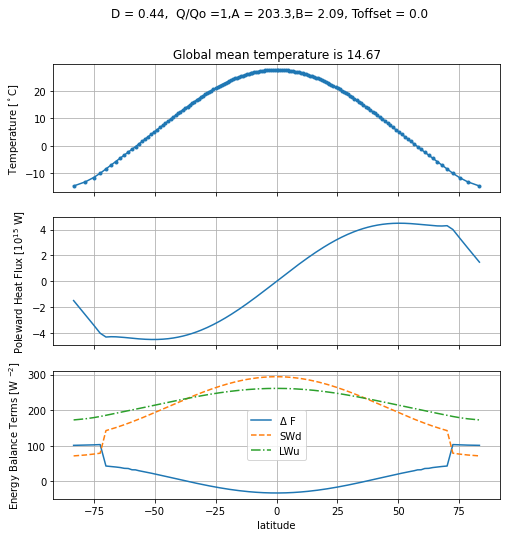

In [2]:
output = run_1d_ebm()

If you check the file which contains the model code ([ebm_models/ebm.py](ebm_models/ebm.py)), you can see that the function starts like this:
```python
def run_1d_ebm(D=0.44,
               scaleQ=1,
               A=203.3,
               B=2.09,
               coldstartflag=False,
               hadleyflag=False,
               noalbedoflag=False,
               jmx=151,
               ):
```
Meaning these values have default values (as can be seen above), but that these can be changed.
- D is the meridional heat diffusion coefficient
- scaleQ can be used to set $Q/Q_0$, which indicates the incoming solar radiation energy in proportion to the value that applies to the current condition. If you want e.g. study a case with 10% more incoming solar energy than today, you enter the value $Q/Q_0 = 1.1$. If you want to test a case with 90% of today's solar radiation, enter the value $Q/Q_0 = 0.9$.
- A and B are as in the equation above
- coldstartflag subtracts 40 degrees from the initial temperature (so it starts from a very cold temperature
- hadleyflag: if true, the hadley cell simulation is turned on
- noalbedoflag: if true, the albedo feedback is turned off in the model (see description below).
- jmx: the number of points along the latitude (from -90 to 90 degrees N).


You cannot change the value of the albedo ($\alpha$), because it is pre-programmed in the model as a function of the temperature at each latitude (x). The default values are $\alpha = 0.3$ when $T ≥ –10^\circ$C (ice-free) and $\alpha = 0.6$ when $T < –10^\circ$C (ice cover).

### Task 2a
Discuss with a lab mate about why the model uses a limit value of $–10^\circ$C was chosen to represent ice-free and ice-covered conditions respectively. Why wouldn't  $0^\circ$C be more appropriate?

Run the model with the default values. You will then get a new window showing the result when the model has been run to equilibrium.

### Task 2b (vary D)
Run the model with the default parameter values. Note the highest value of poleward heat flux, the global mean temperature ($T_m$), and the pole-to-equator temperature difference ($\Delta T_{p-e}$). Then run the model without latitudinal heat flux (i.e. set $D = 0$). How does $T_m$ and $\Delta T_{p-e}$ change? And how does the temperature change at different latitudes? Can you see where the border between ice-covered and ice-free is when D=0 and $D=0.44$ respectively? What is the main significance of the latitudinal heat transport for the climate on earth.

### Task 2c (vary D)
Test the values $D = 0.24$ and $D = 0.64$. Compare with the default ($D = 0.44$). Does the climate change as you expect as $D$ increases or decreases? Why/why not? How do $T_m$ and $\Delta T_{p-e}$ change? How does the boundary between ice-free and ice-covered move? How does the maximum value of the latitudinal heat flux change? How does the balance between incoming shortwave radiation (SWd) and outgoing longwave radiation (LWu) change at different latitudes?

### Task 2d (varying $Q/Q_0$)
The sun's radiation has increased during the time the Earth has existed. According to Ruddiman (**INSERT REF**, p. 45) the sun's radiation was 25% to 30% weaker when the Earth was young. Indications from sedimentary rocks say that the Earth was not ice-covered during the first 3 billion years, i.e. until about 1.6 billion years ago. According to Fig. 3-2 in Ruddiman, the sun's radiation was then about 85% of today's value. You can simulate this it by setting $Q/Q_0$ = 0.85. Run the model (use default values for D, A and B). What kind of climate does it produce? Where is it ice-covered or ice-free? How does it match the geological indications? What you are now thinking about, is what is usually called the Faint young Sun paradox: "With such a weak sun, why wasn't the Earth covered in ice for the first two-thirds of its history?" (Ruddiman p. 45). Yes, how can that be? Do you have any suggestions for an explanation?

### Task 2e (varying $Q/Q_0$)
Assume that the sun's radiation will continue to increase at approximately the same rate as before, i.e. with about 10% per billion years (which corresponds to 1% per 100 million years, or 1 part per thousand per 10 million years). Investigate how long it should take for the Earth to become completely ice-free (if only solar radiation determines this) by increasing the value of $Q/Q_0$ so that it becomes greater than 1. Use default values for the other parameters.



### Task 2f (varying $Q/Q_0$ from cold start)
When the 1-dim model is run, the program code provides certain initial values for all variables at all latitudes. You can choose between two different sets of initial values by running the model with a so-called cold (iced) start or normal start. If you set 'coldstartflag=True' when calling run_1d_ebm(), you choose the cold start.
Choose default values of $D$, $Q/Q_0$, $A$ and $B$. How does the simulated climate differ from that obtained with a normal start? How much must $Q/Q_0$ change, i.e. how much brighter does the sun have to shine, to get an ice-free planet if we start from an ice-covered planet? Compare with the answer in Task 2e. Try to explain the difference.

### Task 2g (vary the CO$_2$ content)
A simple and rough way to vary the CO$_2$ content in the model is to adjust the parameter $A$ by adding some value $\Delta A$ to $A$:
\begin{align}
\Delta A = −3 ln(CO_2/360)
\end{align}

where CO$_2$ is the new atmospheric CO$_2$ content in ppmv. The table below provides some realistic examples for you to study. Run the model for each case and fill in the blank column for the global mean temperature ($T_m$).

| CO$_2$ | $\Delta A$ | $A$   | $T_m$ |
|--------|------------|-------|-------|
| 200    | 1.8        | 205.1 |       |
| 280    | 0.8        | 204.1 |       |
| 360    | 0          | 203.3 |       |
| 400    | −0.3       | 203.0 |       |
| 720    | −2.1       | 201.2 |       |



The natural CO$_2$ content has varied approximately between 200 and 280 ppmv during the glacial cycles of the last million years. 280 ppmv is the "pre-industrial" level around the end of the 18th century. In the mid-1990s, the concentration was 360 ppmv, which is the default value in the 1-dim model. In May 2013, for the first time in modern times, the level of 400 ppmv was reached and the value of 720 ppmv is a likely level at the end of this century unless strong measures are taken to reduce CO2 emissions.
What global average temperature ($T_m$) does the model give for the different CO$_2$ levels in the table?
Do the simulated $T_m$ values of 200 and 280 ppmv agree with our knowledge of global temperature variations during glacial cycles? If not, try to explain why they simulated $T_m$ variations are too large or too small.
At what approximate latitude is the ice-covered/ice-free boundary for the respective CO$_2$ level?
Can you use the values in the table to calculate the climate sensitivity of the model, i.e. the global mean temperature change when the CO$_2$ content doubles? If so, what value of climate sensitivity do you get? Do you get a unique value, or can there be multiple values?